In [1]:
from numpy import array
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle
####

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


#Model Performance Evaluators
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
from joblib import parallel_backend
from joblib import Parallel, delayed
from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

In [2]:
#import data

comb_dinuc_df= pd.read_csv('/shares/kslotkin_share/private/tratnayake/rubyRF/SR_UR/rftrain/datasets/SR_UR_train_set1_di_df.txt',header=0,sep='\t')


np.shape(comb_dinuc_df)


shuf_comb_dinuc_df=comb_dinuc_df.iloc[np.random.permutation(len(comb_dinuc_df))]


#reset index
shuf_comb_dinuc_df=shuf_comb_dinuc_df.reset_index(drop=True)



In [3]:
#drop seq_id
shuf_comb_dinuc_dfdrp= shuf_comb_dinuc_df.drop(['seq_id'],axis=1)

shuf_comb_dinuc_dfdrp.head()

,5p,3p,strand,ptype,length,gc_cont,AA,AC,AG,AT,...,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
0,708,893,1,1,183,0.562842,9,8,11,13,...,12,13,9,18,9,5,2,20,9,8
1,4686,4842,1,0,183,0.234973,50,2,7,17,...,0,7,9,4,5,14,14,5,19,25
2,4625,4841,1,0,225,0.324444,34,4,9,24,...,3,11,13,8,6,17,15,11,25,29
3,4692,4841,1,0,168,0.232143,41,2,3,17,...,0,7,6,3,4,15,13,6,20,26
4,4559,4841,1,1,297,0.346801,55,9,16,24,...,7,14,21,11,10,22,18,12,30,29


In [4]:
ydt=shuf_comb_dinuc_df['ptype']



xdt=shuf_comb_dinuc_df.drop(['seq_id','ptype'],axis=1)



In [5]:
######################### split data #####################################

#split test train data
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(xdt, ydt, test_size=0.2, random_state=256)

Xdt_train.shape, Xdt_test.shape



((2204088, 21), (551022, 21))

In [6]:
with parallel_backend('threading',n_jobs=32 ):


    #print('traing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # Calculate class weights
    #class_weights = compute_class_weight('balanced', classes=np.unique(ydt_train), y=ydt_train)
    #class_weights

    rfc_srur = RandomForestClassifier(random_state=3500,n_estimators = 250,n_jobs=32)
    #class_weight=dict(enumerate(class_weights) ))




#    rfc_dicomb = RandomForestClassifier(random_state=3500,n_estimators = 400,n_jobs=32,
#     class_weight=dict(enumerate(class_weights) ),
#     criterion='log_loss',
#        max_depth=100,
#        min_samples_split=10,
#        min_samples_leaf=2,
#        max_features='log2',
#        bootstrap=True
#        )


    print('training >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    #model train
    rfc_srur.fit(Xdt_train, ydt_train)


    # Predict the Test set results

    y_pred =  rfc_srur.predict(Xdt_test)

training >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [7]:
###############################################################################

# test accuracy score 

from sklearn.metrics import accuracy_score

print('Model test accuracy : {0:0.4f}'. format(accuracy_score(ydt_test, y_pred)))



print ("\nClassification report :\n",(classification_report(ydt_test,y_pred)))


Model test accuracy : 0.6987

Classification report :
               precision    recall  f1-score   support

           0       0.68      0.75      0.72    278828
           1       0.72      0.64      0.68    272194

    accuracy                           0.70    551022
   macro avg       0.70      0.70      0.70    551022
weighted avg       0.70      0.70      0.70    551022



In [8]:
mfilename='/shares/kslotkin_share/private/tratnayake/rubyRF/SR_UR/srur_models/rfc_SRUR_set1_v1.pkl'

pickle.dump( rfc_srur,open(mfilename,'wb'))

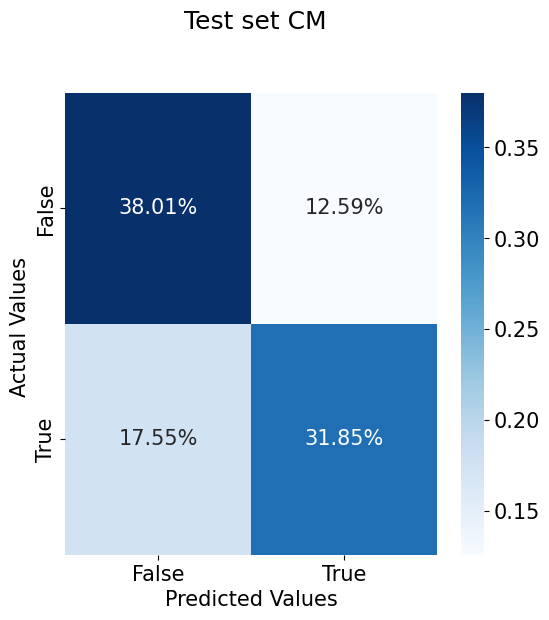

In [9]:
plt.rcParams.update({'font.size': 15})

# #####################################  CONFUSION MATRIX for test set   ########################################################################
fig1=plt.figure(figsize = (6,6))
cm = confusion_matrix(y_true=ydt_test, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()